In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [48]:
points = np.random.random(size=(100,2))*20
# points = np.array([[5, 3],[-1, 1],[1, -2],[-3, -2]])
points

array([[18.87568366, 13.27280225],
       [ 6.92110736, 13.95924931],
       [12.49670139, 13.9247935 ],
       [ 4.17521807,  6.86639484],
       [ 5.43540415,  0.51004378],
       [ 8.98741636, 15.22603405],
       [ 7.16511006, 10.68172619],
       [12.77182197,  0.75685692],
       [19.60467166, 17.8996587 ],
       [14.90872193, 17.04523281],
       [10.57637027, 11.52965545],
       [ 7.38926541, 11.24321495],
       [18.06674048,  3.60839424],
       [18.28852257,  7.05652822],
       [ 4.30799627, 19.33060783],
       [ 4.42548129, 10.97167468],
       [ 6.12941182, 16.11925481],
       [12.7355444 ,  1.46821149],
       [17.50433592, 14.14030645],
       [ 6.87983668, 13.07937088],
       [ 5.34889137, 16.019566  ],
       [ 1.31148825, 11.87184247],
       [14.84542595,  1.58202696],
       [ 4.82662062,  1.06032527],
       [17.52937174,  7.0085957 ],
       [ 2.84190516,  5.06686241],
       [ 9.61683082, 17.51037294],
       [ 6.03732281, 11.40833528],
       [ 9.58860198,

In [4]:
def random_seed() -> tuple:
    '''
    Generate random seed with in the set point provided in the problem, the 
    seed is generated base on uniform distribution 

    Returns:
        uniformly random point
    '''

    return [np.random.uniform(points[:,0].min(), points[:,0].max()), 
            np.random.uniform(points[:,1].min(), points[:,1].max())]

In [5]:
k = 3

@dataclass
class Cluster:
    centroid: list[float]
    members: list[float, float]

clusters = [Cluster(centroid=random_seed(), members=[]) for _ in range(k)]

for i in range(10):

    for x,y in points:
        # distance to point
        distances = [(x-cluster.centroid[0])**2 + (y-cluster.centroid[1])**2 
                     for cluster in clusters]

        min_index = np.argmin(distances)
        clusters[min_index].members.append([x,y])

    for cluster in clusters:
        cluster.centroid = np.mean(cluster.members, axis=0) if cluster.members else random_seed()
        if i != 9:
            cluster.members=[]

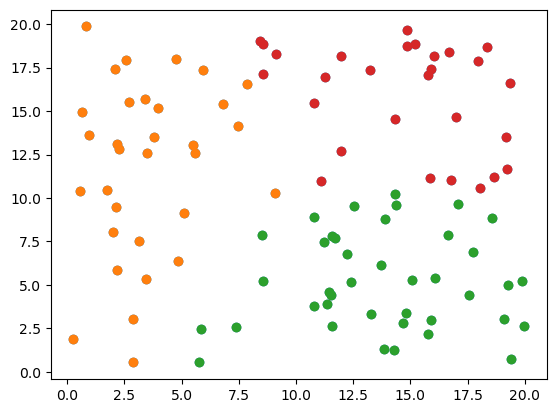

In [6]:
plt.scatter(points[:,0], points[:,1])

for cluster in clusters:
    if cluster.members:
        plt.scatter(np.array(cluster.members)[:,0], 
                    np.array(cluster.members)[:,1])
